In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import networkx as nx
from utils import *

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
df = load_data()
df['ArticleChannel'].unique()

array(['Inland', 'Meinung', 'International', 'Sport', 'Panorama',
       'Wirtschaft', 'Gesundheit', 'Web', 'Kultur', 'Bildung',
       'Wissenschaft', 'Immobilien', 'User', 'dieStandard', 'Etat',
       'Zukunft', 'Karriere', 'Lifestyle', 'Diverses', 'Reisen',
       'AutoMobil', 'Familie'], dtype=object)

In [4]:
# select categories to analyze
channels = ['Inland', 'Meinung', 'International', 'Sport', 'Panorama',
       'Wirtschaft', 'Gesundheit', 'Web', 'Kultur', 'Bildung',
       'Wissenschaft', 'Immobilien', 'User', 'dieStandard', 'Etat',
       'Zukunft', 'Karriere', 'Lifestyle', 'Diverses', 'Reisen',
       'AutoMobil', 'Familie']

filtered_df, articles_per_user, selected_users = filter_users(df, channels, min_articles=5, max_num_users=2000)
print(f"Number of selected users: {len(selected_users)}")

Number of selected users: 2000


In [5]:
# create graph
weights = iom(selected_users, articles_per_user)
threshold = np.percentile(weights.flatten(), 75)
graph = build_graph(selected_users, weights, threshold)

  0%|          | 2/2000 [00:00<01:58, 16.90it/s]

100%|██████████| 2000/2000 [00:51<00:00, 38.76it/s] 


In [6]:
# print distribution of comments in the selected categories
category_comments_percentage = filtered_df['ArticleChannel'].value_counts().div(len(filtered_df))
print(category_comments_percentage)

ArticleChannel
Inland           0.256112
Meinung          0.133464
Panorama         0.133412
Web              0.082769
International    0.073027
Wirtschaft       0.065021
Sport            0.057664
Etat             0.048697
Kultur           0.031307
User             0.017398
Wissenschaft     0.017047
Gesundheit       0.013842
Lifestyle        0.013678
dieStandard      0.012232
Bildung          0.010443
AutoMobil        0.007350
Diverses         0.006142
Immobilien       0.005866
Zukunft          0.004644
Reisen           0.003764
Familie          0.003153
Karriere         0.002967
Name: count, dtype: float64


In [8]:
# save graph for gephi
# category_count_df = most_common_category_per_user(filtered_df)
# nx.set_node_attributes(graph, category_count_df['most_common'].to_dict(), 'category')
# nx.write_gexf(graph, '../graphs/iom_graph_all_categories.gexf')

## Label Propagation

In [44]:
# label_prop_communities = list(nx.community.asyn_lpa_communities(graph, 'weight'))
# print(f"Number of communities: {len(label_prop_communities)}")
# print(f" Sizes of the communities: {[len(c) for c in label_prop_communities]}")
# print(f"Modularity: {nx.algorithms.community.modularity(graph, label_prop_communities)}")

In [45]:
# comments_in_category_per_community(label_prop_communities,
#                                    filtered_df,
#                                    percentage=True,
#                                    weight_by_category_distribution=True,
#                                    save_dir='../plots/label_prop_' + '_'.join(channels) + '.svg')

In [46]:
# plot_subtopics_per_community(label_prop_communities, filtered_df, 8, '../plots/label_prop_subtopics_' + '_'.join(channels) + '.svg')

In [47]:
# plot_gender_per_community(label_prop_communities, filtered_df, '../plots/label_prop_gender_' + '_'.join(channels) + '.svg')

## Max Modularity

In [9]:
max_modularity_communities = nx.community.modularity_max.greedy_modularity_communities(graph, 'weight')
print(f"Number of communities: {len(max_modularity_communities)}")
print(f" Sizes of the communities: {[len(c) for c in max_modularity_communities]}")
print(f"Modularity: {nx.algorithms.community.modularity(graph, max_modularity_communities)}")

Number of communities: 4
 Sizes of the communities: [945, 777, 276, 2]
Modularity: 0.07697761598977129


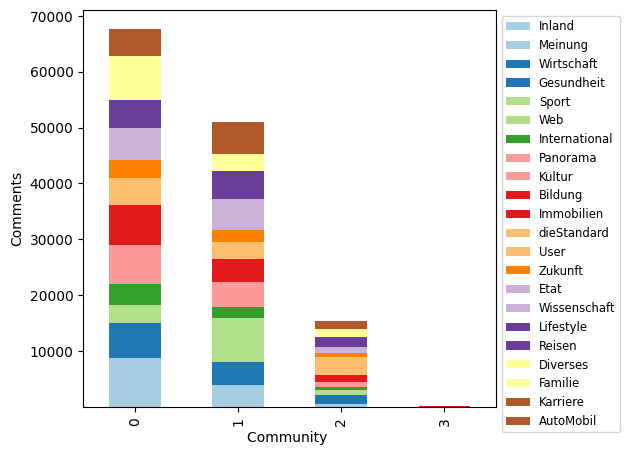

In [18]:
# generate dataframe with number of comments (or a weighted variant, if normalized) per category for each community
comments_in_category_per_community(max_modularity_communities,
                                   filtered_df,
                                   percentage=False,
                                   weight_by_category_distribution=True,
                                   save_dir='../plots/max_modularity_' + '_'.join(channels) + '.svg')


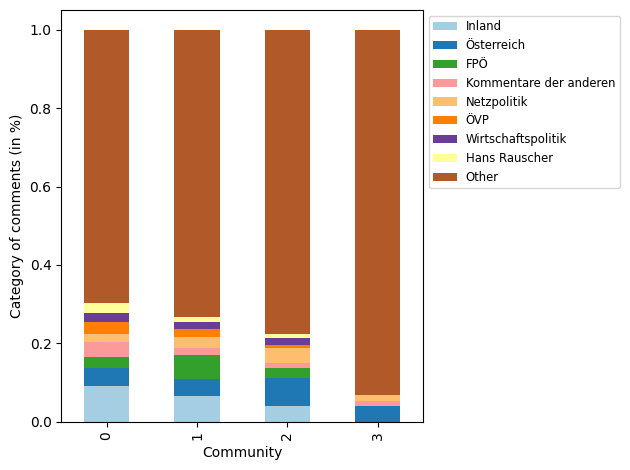

In [11]:
plot_subtopics_per_community(max_modularity_communities, filtered_df, 8, '../plots/max_modularity_subtopics_' + '_'.join(channels) + '.svg')

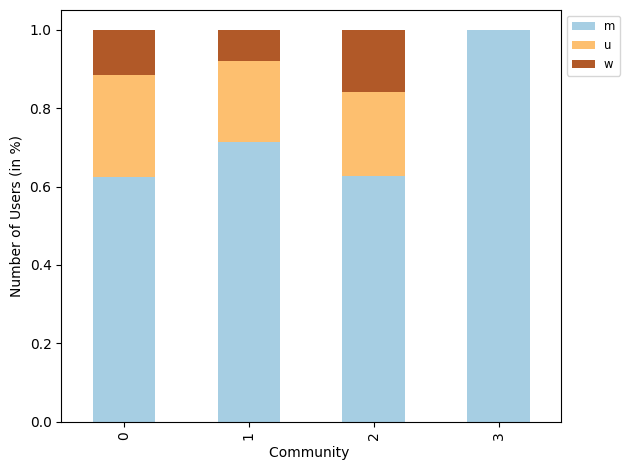

In [12]:
plot_gender_per_community(max_modularity_communities, filtered_df, '../plots/max_modularity_gender_' + '_'.join(channels) + '.svg')

## Louvain Communities

In [13]:
louvain_communities = nx.community.louvain_communities(graph, 'weight')
print(f"Number of communities: {len(louvain_communities)}")
print(f" Sizes of the communities: {[len(c) for c in louvain_communities]}")
print(f"Modularity: {nx.algorithms.community.modularity(graph, louvain_communities)}")

Number of communities: 4
 Sizes of the communities: [431, 82, 578, 909]
Modularity: 0.10164557042088374


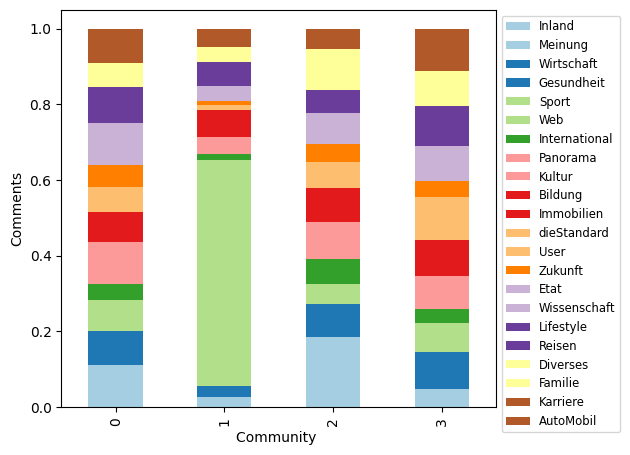

In [17]:
comments_in_category_per_community(louvain_communities,
                                   filtered_df,
                                   percentage=True,
                                   weight_by_category_distribution=True,
                                   save_dir='../plots/louvain_' + '_'.join(channels) + '.svg')

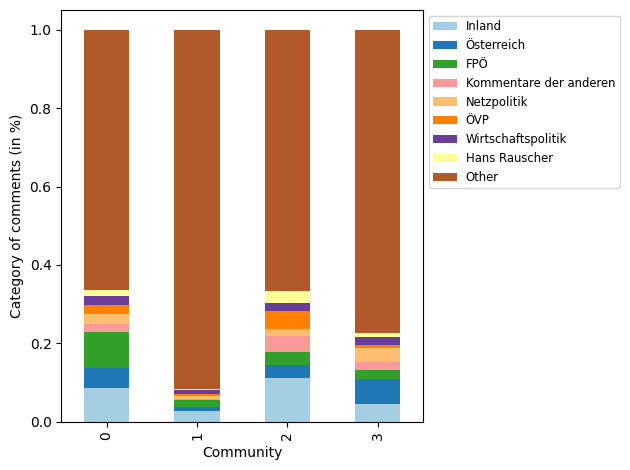

In [15]:
plot_subtopics_per_community(louvain_communities, filtered_df, 8, '../plots/louvain_subtopics_' + '_'.join(channels) + '.svg')

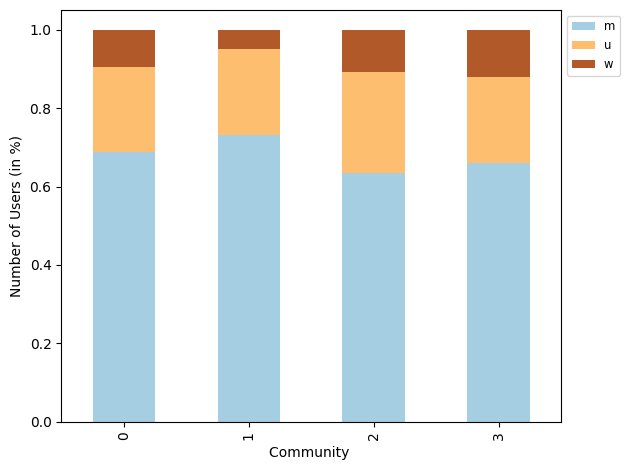

In [16]:
plot_gender_per_community(louvain_communities, filtered_df, '../plots/louvain_gender_' + '_'.join(channels) + '.svg')